# 1. Data Cleaning

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv(r"C:\Users\User\Downloads\attacks.csv", encoding= "latin1", sep = ",")
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### -> Renaming columns and dropping unnecessary columns

In [8]:
#Checking what columns we have
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [9]:
#Checking how many rows we have 
df.shape

(25723, 24)

In [10]:
#Standadarzing column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip('_')
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

---------------------------------------------------------------------------------------------
The following columns don't give us many insights for our prediction 
so we'll remove them from our data frame: 

'Investigator or Source', 'pdf', 'href formula', 'href',

'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22','Unnamed: 23'

-------------------------------------------------------------------------------------

In [11]:
#Dropping unnecessary columns
df.drop(['investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'], axis=1, inplace=True)
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  8702 non-null   object 
 1   date         6302 non-null   object 
 2   year         6300 non-null   float64
 3   type         6298 non-null   object 
 4   country      6252 non-null   object 
 5   area         5847 non-null   object 
 6   location     5762 non-null   object 
 7   activity     5758 non-null   object 
 8   name         6092 non-null   object 
 9   sex          5737 non-null   object 
 10  age          3471 non-null   object 
 11  injury       6274 non-null   object 
 12  fatal_(y/n)  5763 non-null   object 
 13  time         2948 non-null   object 
 14  species      3464 non-null   object 
dtypes: float64(1), object(14)
memory usage: 2.9+ MB


#### -> Checking for NaNs and standardizing each column if necessary

##### 1. Case Number

In [13]:
#Checking if we can drop all the rows in which case_number is null
df[df['case_number'].isnull()]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------
Since the entire rows are made of NaNs when case_number is null we'll be dropping these rows as
they don't add any insights to our model
----------------------------------------------------------------------------------------------

In [14]:
#Drop the rows that all of them are Nans
df.dropna(how='all', inplace=True)
df['case_number'].isna().sum()

1

In [15]:
# We still have one null
df[df['case_number'].isnull()]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN


In [16]:
#Checking if when case_number is 0, all the other columns are also NaNs
df[df['case_number'].str.strip() == '0']

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Dropping all rows in which the columns are all null but in case_number
df.dropna(subset=df.columns.difference(['case_number']), how='all', inplace=True)
df[df['case_number'].str.strip() == '0']

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species


--------------------------------------------------------------------------------------------------------
case_number is still having however weird values, such as dates and letters. 

To standardize 
this column we can replace it by the number of the row plus one (row_number + 1), so that all rows are unique

--------------------------------------------------------------------------------------------------------

In [18]:
#Replacing case_number with the row index + 1 (so the first case_number isn't 0 or NaN)
df['case_number'] = df.index + 1
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species
0,1,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,3,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,4,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,5,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [19]:
#Checking if case_number is now an int instead of object
df['case_number'].dtype

dtype('int64')

##### 2. Date

In [20]:
#Funtion that turns all values in date into actual dates
from dateutil import parser

def convert_to_datetime(df, column_name):
    def parse_date(row):
        try:
            # Try to parse the date using dateutil.parser
            parsed_date = parser.parse(row[column_name], dayfirst=True)
            
            # Check if the year is before 1677 
            #(The default range for pandas datetime objects is from 1677-09-21 00:12:43.145225 
            #to 2262-04-11 23:47:16.854775.),otherwise it returns out of bounds error
            if parsed_date.year < 1677:
                # If before 1677, return '01-01-1677'
                return '01-01-1678'
            
            # Extract only the date part from the parsed datetime object
            date_only = parsed_date.strftime('%d-%m-%Y')
            
            return date_only
        
        except Exception:
            # If there is an error in parsing, return a default value
            return '01-01-1900'  # Adjust the default value as per your requirement
    
    df[column_name] = df.apply(parse_date, axis=1)
    return df

In [21]:
#Converting all dates into actual dates using the previous function
df = convert_to_datetime(df, 'date')

In [22]:
#Checking row 4644 because it returns an error in the next cell due to this date
print(df.iloc[4644])
#Replacing the date for this specif row it its correct year
df.loc[4644, 'date'] = '22-07-1944'
print('----------------------')
print(df.iloc[4644])

case_number                                   4645
date                                    01-01-1678
year                                        1944.0
type                                    Unprovoked
country                               SOUTH AFRICA
area                         Western Cape Province
location                                 Hartenbos
activity                                  Swimming
name                                Albert Schmidt
sex                                              M
age                                             17
injury                   FATAL, body not recovered
fatal_(y/n)                                      Y
time                                         16h30
species        White shark, according to witnesses
Name: 4644, dtype: object
----------------------
case_number                                   4645
date                                    22-07-1944
year                                        1944.0
type                             

In [23]:
#Converting column date to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print(df['date'].dtype)
df.head()

datetime64[ns]


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species
0,1,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,3,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,4,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,5,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


##### 3. Year

In [24]:
# Replace non-finite values with a specific value (e.g., 1900) and converting column year from float to int
df['year'] = df['year'].replace([np.nan, 0], 1900)
df['year'] = df['year'].astype(int)
df['year'].dtype

df['year'].value_counts()

2015    143
1900    140
2017    136
2016    130
2011    128
       ... 
1787      1
1786      1
1785      1
1784      1
5         1
Name: year, Length: 248, dtype: int64

##### 4. Type

In [25]:
#Function that replaces the type with 'Sea Disaster' for types with the word 'Boat'
def replace_type(df, column_name):
    # Replace NaN values with 'Invalid'
    df[column_name] = df[column_name].fillna('Invalid')
    
    # Use string methods to check if 'boat' is present in 'type' column (ignore case)
    condition = df[column_name].str.contains('boat', case=False)
    
    # Replace values that meet the condition with 'Sea Disaster'
    df.loc[condition, column_name] = 'Questionable'
    
    return df

In [26]:
#Standadizing the types to have only: 'Unprovoked', 'Provoked', 'Invalid', 'Sea Disaster', 'Questionable'
df = replace_type(df, 'type')
df['type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          551
Questionable     343
Sea Disaster     239
Name: type, dtype: int64

##### 5. Country

In [28]:
#Making sure all countries are set with upper case
df['country'] = df['country'].str.upper().str.replace(r'\W', ' ', regex=True).str.strip(' ')

In [29]:
# Set the display options to show all values without truncation
pd.set_option('display.max_rows', None)
df['country'].value_counts(dropna=False).sort_index()

ADMIRALTY ISLANDS                           1
AFRICA                                      1
ALGERIA                                     1
AMERICAN SAMOA                              3
ANDAMAN   NICOBAR ISLANDAS                  1
ANDAMAN ISLANDS                             1
ANGOLA                                      1
ANTIGUA                                     2
ARGENTINA                                   1
ARUBA                                       1
ASIA                                        1
ATLANTIC OCEAN                             17
AUSTRALIA                                1338
AZORES                                      5
BAHAMAS                                   109
BAHREIN                                     1
BANGLADESH                                  1
BARBADOS                                    6
BAY OF BENGAL                               1
BELIZE                                      3
BERMUDA                                    16
BETWEEN PORTUGAL   INDIA          

--------------------------------------------------------------------------------------------------
Because we have some invalid countries (eg. 'BETWEEN PORTUGAL & INDIA', 'DIEGO GARCIA', ) and a few NaN
we'll check if these countris are on the all_countries pandas library and if not mark as 'UNKNOWN'

---------------------------------------------------------------------------------------------------

In [31]:
#Installing and importing geonamescache library to have a list of all countries 
#to compare with our column country
!pip install geonamescache
import geonamescache

gc = geonamescache.GeonamesCache()
all_countries = list(gc.get_countries_by_names().keys())

# Add 'Djibouti' to the list
all_countries.append('Djibouti')

#Turning all countries upper case so we can compare later with our country column
all_countries = [country.upper() for country in all_countries]
print(all_countries)

['ANDORRA', 'UNITED ARAB EMIRATES', 'AFGHANISTAN', 'ANTIGUA AND BARBUDA', 'ANGUILLA', 'ALBANIA', 'ARMENIA', 'ANGOLA', 'ANTARCTICA', 'ARGENTINA', 'AMERICAN SAMOA', 'AUSTRIA', 'AUSTRALIA', 'ARUBA', 'ALAND ISLANDS', 'AZERBAIJAN', 'BOSNIA AND HERZEGOVINA', 'BARBADOS', 'BANGLADESH', 'BELGIUM', 'BURKINA FASO', 'BULGARIA', 'BAHRAIN', 'BURUNDI', 'BENIN', 'SAINT BARTHELEMY', 'BERMUDA', 'BRUNEI', 'BOLIVIA', 'BONAIRE, SAINT EUSTATIUS AND SABA ', 'BRAZIL', 'BAHAMAS', 'BHUTAN', 'BOUVET ISLAND', 'BOTSWANA', 'BELARUS', 'BELIZE', 'CANADA', 'COCOS ISLANDS', 'DEMOCRATIC REPUBLIC OF THE CONGO', 'CENTRAL AFRICAN REPUBLIC', 'REPUBLIC OF THE CONGO', 'SWITZERLAND', 'IVORY COAST', 'COOK ISLANDS', 'CHILE', 'CAMEROON', 'CHINA', 'COLOMBIA', 'COSTA RICA', 'CUBA', 'CABO VERDE', 'CURACAO', 'CHRISTMAS ISLAND', 'CYPRUS', 'CZECHIA', 'GERMANY', 'DJIBOUTI', 'DENMARK', 'DOMINICA', 'DOMINICAN REPUBLIC', 'ALGERIA', 'ECUADOR', 'ESTONIA', 'EGYPT', 'WESTERN SAHARA', 'ERITREA', 'SPAIN', 'ETHIOPIA', 'FINLAND', 'FIJI', 'FALKLAND

--------------------------------------------------------------------------------------------------------
The bellow function iterates over each row of the DataFrame using iterrows(). 

-> It checks if the value in the "country" column exists in the all_countries list:

    1. If it doesn't, it checks if the value in the "area" column contains a country that exists in the all_countries list or if country contains a country in the all_countries list. 

    2. If it does, it replaces the value in the "country" column with that extracted_country name using df.at[index, 'country'] = extracted_country.

    3. If the extracted_country is not found in all_countries, it replaces the country with the string 'UNKNOWN' using df.at[index, 'country'] = 'UNKNOWN'.

----------------------------------------------------------------------------------------------------------

In [32]:
#Importing regex
import re

#Function to replaces the country name 
#If a value doesn't exist, it will check if the country name appears in the "area" column. 
#If it does, it will replace the value with the country name.
def replace_country(df, country_column, area_column, all_countries):
    # Replace NaN values with 'Unknown'
    df[country_column] = df[country_column].fillna('UNKNOWN')
    
    #Iterating over each row of the DataFrame using iterrows()
    for index, row in df.iterrows():
        country = str(row[country_column])  # Ensure the value is a string
        area = str(row[area_column])  # Ensure the value is a string
        area = area.upper() #Ensuring it is in upper case like all_countries
        
        #Check if Country is "OKINAWA" or "CEYLON" replace with "JAPAN" and "SRI LANKA", respectively
        if country == 'OKINAWA':
            country = 'JAPAN'
        elif country == 'CEYLON':
            country = 'SRI LANKA'
        elif country == 'USA':
            country = 'UNITED STATES'
        
        # Check if any country name from all_countries exists in the area/country and extracts the country
        pattern = r"\b(" + "|".join(all_countries) + r")\b"
        match_country = re.search(pattern, country, flags=re.IGNORECASE)
        match_area = re.search(pattern, area, flags=re.IGNORECASE)
        
        if match_country:
            extracted_country = match_country.group(0)
        else:
            if match_area:
                extracted_country = match_area.group(0)
            else:
                extracted_country = None
        
        #Checking if the value in the "country" column exists in the all_countries list
        if country in all_countries:
            df.at[index, country_column] = country
        #If it doesn't, it checks if the value in the "area" column exists in the all_countries list
        else:
            if extracted_country in all_countries: 
                df.at[index, country_column] = extracted_country
            #Otherwise it replaces the country with the string 'UNKNOWN'
            else:
                df.at[index, country_column] = 'UNKNOWN'
    
    return df

In [33]:
#Replacing the countries with valid values using the previous function
df = replace_country(df,'country', 'area', all_countries)
pd.set_option('display.max_rows', None)
df['country'].value_counts(dropna=False).sort_index()

ALGERIA                           1
AMERICAN SAMOA                    3
ANGOLA                            1
ARGENTINA                         1
ARUBA                             1
AUSTRALIA                      1340
BAHAMAS                         109
BANGLADESH                        1
BARBADOS                          6
BELIZE                            3
BERMUDA                          17
BRAZIL                          113
BRITISH VIRGIN ISLANDS            1
CANADA                           12
CAYMAN ISLANDS                    2
CHILE                             8
CHINA                             8
COMOROS                           1
COOK ISLANDS                      1
COSTA RICA                       17
CROATIA                          34
CUBA                             46
CURACAO                           1
CYPRUS                            1
DJIBOUTI                          1
DOMINICAN REPUBLIC                7
ECUADOR                          10
EGYPT                       

##### 6. Area

In [34]:
#Making sure all areas are set with upper case
df['area'] = df['area'].str.upper().str.replace(r'\W', ' ', regex=True).str.strip(' ')

# Set the display options to show all values without truncation
df['area'].value_counts(dropna=False).sort_index()

04 05N 13 23W                                                        1
1 000 MILES EAST OF HAWAII                                           1
1000 MILES WEST OF HAWAII                                            2
10ºS  142ºE                                                          1
12 MILES OFF THE NORTH COAST                                         1
150 MILES OFFSHORE                                                   1
165  MILES FROM BERMUDA                                              1
180 MILES SOUTHEAST OF OKINAWA                                       1
18S   50E                                                            1
19S  178 E                                                           1
2 TO 3 MILES OFF TABOGUILLA ISLAND  PACIFIC OCEAN                    1
200 NM SOUTHEAST OF MANILA                                           1
22ºN  88ºE                                                           4
25 KM OFF THE COAST OF IRAN   483KM FROM MOUTH OF PERSIAN GULF       1
250 MI

--------------------------------------------------------------------------------------------------------
Since we're having a lot of distinct values, we'll check:

    1. if the area cointains an existing region in the pycountry library and replace area with {region_name}, {country}. 

    2. if not we'll check if it has the word "North", "Central", "South", "East", "West" and change area for {North, Central, South, East, West},{COUNTRY}
--------------------------------------------------------------------------------------------------------

In [35]:
#Installing it
!pip install pycountry

#Importing a Python package that provides a comprehensive collection of country-related data. 
import pycountry

#Function that returns a list of regions for a given country
def get_cities_by_country(country_name):
    country_code = None
    subdivisions_list = []  # Initialize an empty list to store the subdivision names
    
    for country in pycountry.countries:
        if country.name == country_name:
            country_code = country.alpha_2
            break
    
    if country_code:
        for subdivision in pycountry.subdivisions.get(country_code=country_code):
            subdivisions_list.append(subdivision.name)  # Add subdivision name to the list
        
        return subdivisions_list  # Return the list of subdivision names
    else:
        return ''  # Return empty list if country not found

  Obtaining dependency information for pycountry from https://files.pythonhosted.org/packages/48/12/fdbcd29b5a243af2f1c1a83636a21e3837aeaa070c9212ebe657e39ce563/pycountry-23.12.11-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.6/6.2 MB 20.1 MB/s eta 0:00:01
   -------------------- ------------------- 3.2/6.2 MB 40.6 MB/s eta 0:00:01
   -------------------------------- ------- 5.1/6.2 MB 36.1 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 36.1 MB/s eta 0:00:00


In [36]:
#Function that replaces the area with a valid region, 
#or area (North, Central, South, East, West) and country_name
def replace_area(df, country_column, area_column):
    #List of regions
    regions = []
    
    #Iterating over each row of the DataFrame using iterrows()
    for index, row in df.iterrows():
        # Ensure the value is a string and turns 'SRI LANKA' into 'Sri Lanka', for example
        country = str(row[country_column]).title()  
        # Ensure the value is a string
        area = str(row[area_column]).title()  
        
        regions = [city for city in get_cities_by_country(country)]
        
        extracted_region = None
        
        #In case there's a list of regions we extract the area
        if regions != []:
            # Check if area cointains a region in the list
            pattern = r"\b(" + "|".join(map(re.escape, regions)) + r")\b"
            match_area = re.search(pattern, area, flags=re.IGNORECASE)

            if match_area:
                extracted_region = match_area.group(0) + ', ' + country
            #If there are no matches in regions list, then we check if words in area are within a region
            #For example 'Veracruz' should match 'Veracruz de Ignacio de la Llave'
            else:
                pattern = r"\b" + re.escape(area) + r"\b"

                for region in regions:
                    if re.search(pattern, region, flags=re.IGNORECASE):
                        extracted_region = region + ', ' + country
                        break
            
            #In case there were no matches at all we check if there's key words like 
            #'north', 'south', 'west', 'east', 'central'
            if extracted_region == None:
                pattern = r"(north|south|west|east|central)"
                match_area = re.search(pattern, area, flags=re.IGNORECASE)

                if match_area:
                    extracted_region = match_area.group(0) + ', ' + country
    
        #Replacing the area with the extracted_region in case there was a match
        if extracted_region != None:
            df.at[index, area_column] = extracted_region
        else:
            df.at[index, area_column] = 'UNKNOWN'

    return df

In [37]:
#Replacing the areas with valid values using the previous function
df = replace_area(df,'country', 'area')
pd.set_option('display.max_rows', None)
df['area'].value_counts(dropna=False).sort_index()

Aichi, Japan                                       1
Alabama, United States                            15
Alagoas, Brazil                                    2
Alaska, United States                              1
Ancona, Italy                                      1
Antofagasta, Chile                                 1
Antsiranana, Madagascar                            1
Bahia, Brazil                                      3
Baja California, Mexico                           11
Bali, Indonesia                                    6
Banaadir, Somalia                                  4
Batanes, Philippines                               1
Batangas, Philippines                              1
Bayelsa, Nigeria                                   1
Berry Islands, Bahamas                             2
Bimini, Bahamas                                    7
Bocas Del Toro, Panama                             2
Bocas del Toro, Panama                             1
Bougainville, Papua New Guinea                

##### 7. Location

-------------------------------------------------------------------------------------------------------
Location might not be a relevant column for us, so we'll drop eventually possibly

-----------------------------------------------------------------------------------------------------

##### 8. Activity

----------------------------------------------------------------------------------------------------------
For column 'activity' we'll divide it into categories: 

-> swimming: including any injury containing words 'swimming', 'swimm', 'bathing', 'dangling', 'floating'

-> diving: including words such as 'dive', 'diving', 'scuba', 'dived''

-> fishing: 'chase', 'catch','catching', 'attract', 'attracting','fishing', 'fish', 'retrieve', 'net', 'collecting', 'crabbing', 'crayfishing', 'feeding', 'rescuing', 'rescue','trap

-> water sport: 'board', 'canoe', 'surf', 'surfing', 'boarding', 'canoeing', 'paddle', 'paddling'

-> sailing: 'boat', 'sailing', 'sail', 'ship', 'sailboat', 'adrift', 'adrifting', 'conducting', 'cruise', 'cruising', 'anchor', 'escape', 'escaping', 'yacht','yachting'

-> air disaster: 'air', 'aircraft', 'crashed'

-> unknown: For anything else

---------------------------------------------------------------------------------------------------------

In [38]:
#Function that replaces the activity with its respective category
def replace_activity(df, activity_column):
    for index, row in df.iterrows():
        activity = str(row[activity_column]).lower()  # Convert to lowercase for case insensitivity
        
        
        # Check for specific keywords/categories using string matching
        if any(keyword in activity for keyword in ['swimming', 'swimm', 'bathing', 'dangling', 'floating']):
            df.at[index, activity_column] = 'swimming'

        elif any(keyword in activity for keyword in ['dive', 'diving', 'scuba', 'dived']):
            df.at[index, activity_column] = 'diving' 

        elif any(keyword in activity for keyword in ['chase', 'catch','catching', 'attract', 
                                                     'attracting','fishing', 'fish', 'retrieve', 'net', 
                                                     'collecting', 'crabbing', 'crayfishing', 'feeding', 
                                                     'rescuing', 'rescue','trap']):
            df.at[index, activity_column] = 'fishing'
        
        elif any(keyword in activity for keyword in ['board', 'canoe', 'surf', 'surfing', 'boarding', 
                                                     'canoeing', 'paddle', 'paddling']):
            df.at[index, activity_column] = 'water sport'
        
        elif any(keyword in activity for keyword in ['boat', 'sailing', 'sail', 'ship', 'sailboat', 
                                                     'adrift', 'adrifting', 'conducting', 'cruise', 
                                                     'cruising', 'anchor', 'escape', 'escaping', 'yacht',
                                                     'yachting']):
            df.at[index, activity_column] = 'sailing'
            
        elif any(keyword in activity for keyword in ['air', 'aircraft', 'crashed']):
            df.at[index, activity_column] = 'air disaster'

        else:
            df.at[index, activity_column] = 'unknown'
            
    return df

In [39]:
#Replacing the activities using the above function
df = replace_activity(df, 'activity')
df['activity'].value_counts(dropna=False).sort_index()

air disaster      29
diving           609
fishing         1213
sailing          187
swimming        1367
unknown         1410
water sport     1487
Name: activity, dtype: int64

##### 9. Name

In [40]:
name = df['name'].value_counts()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(name)

male                                                                                                                                                                                                                              550
female                                                                                                                                                                                                                             97
boy                                                                                                                                                                                                                                23
2 males                                                                                                                                                                                                                            16
boat                                                                            

------------------------------------------------------------------------------------------------------
Like Location name might not be very relevant for our model, therefore we'll probably drop it too 

------------------------------------------------------------------------------------------------------

##### 10. Sex

In [41]:
#Replacing 'sex' column with 'm', 'f' and 'o'
df['sex'] = df['sex'].replace({'M': 'm', 'F': 'f', 'N': 'o', 'lli': 'o', '.': 'o', 'M ': 'm'})
df['sex'].value_counts()

m    5096
f     637
o       4
Name: sex, dtype: int64

##### 11. Age

----------------------------------------------------------------------------------------------------------
For age we'll divide all ges into categories such as:

-> child: 0-12

-> teenage: 13-17

-> young Adult: 18-30

-> adult: 30-49

-> middle-age: 50-64

-> elderly: 65+

-----------------------------------------------------------------------------------------------------------

In [43]:
#Function that replaces the ages whith its age category
def replace_age(age):
    if pd.isnull(age):  # Check for missing values
        return 'unknown'
    age = age.lower()  # Convert to lowercase for case insensitivity
    
    # Check for specific patterns using regular expressions
    if re.search(r'\d+', age):  # Check for any digit in the string
        age_number = int(re.findall(r'\d+', age)[0])  # Extract the first digit as the age number
        
        if re.search(r'mid-\d+s', age):  # Check for the 'mid-30s' or 'mid-20s' pattern
            age_number = age_number + 5  # Extract the number from the pattern and 5 more years
            if age_number >= 20 and age_number <= 30:
                return 'young-adult'
            elif age_number >= 30 and age_number <= 49:
                return 'adult'
            else:
                return 'unknown'
        
        elif age_number >= 0 and age_number <= 12:
            return 'child'
        elif age_number >= 13 and age_number <= 17:
            return 'teenager'
        elif age_number >= 18 and age_number <= 30:
            return 'young-adult'
        elif age_number >30 and age_number <= 49:
            return 'adult'
        elif age_number >= 50 and age_number <= 64:
            return 'middle-age'
        elif age_number >= 65:
            return 'elderly'
        else:
            return 'unknown'
    
    elif re.search(r'child', age):  # Check for the presence of 'child' in the string
        return 'child'
    
    elif re.search(r'teen', age):  # Check for the presence of 'teen' in the string
        return 'teenager'
    
    elif age.startswith('young'):
        return 'young-adult'
    
    elif re.search(r'adult', age):  # Check for the (adult)' pattern
        return 'adult'
    
    elif age.startswith('middle'):
        return 'middle-age'
    
    else:
        return 'unknown'
    

In [44]:
#Applying replace_age funtion to the 'age' column
df['age'] = df['age'].apply(replace_age)

# Print the updated DataFrame
df['age'].value_counts(dropna=False).sort_index()

adult           823
child           293
elderly          54
middle-age      249
teenager        647
unknown        2842
young-adult    1394
Name: age, dtype: int64

##### 12. Injury

------------------------------------------------------------------------------------------------------
For column injury we'll also divide it into categories: 

-> injured: including any injury containing words 'injured', 'laceration', 'bite', 'wound', 'gash',
    'scratch', 'cut','bitten', 'mauled', 'teeth', 'recovered','serious', 'tooth', 'puncture', 'severed'

-> dead: including words such as 'perish', 'dead', 'death', 'body', 'bodies', 'lost', 'remains'

-> no injury: 'hoax', 'no injury', 'survived', 'survive'

-> unknown: For anything else

----------------------------------------------------------------------------------------------------------

In [45]:
#Fuction that replaces the injury with a set category given a keyword 
def replace_injury(df, injury_column):
    for index, row in df.iterrows():
        injury = str(row[injury_column]).lower()  # Convert to lowercase for case insensitivity

        # Check for specific keywords/categories using string matching
        if any(keyword in injury for keyword in ['injured', 'laceration', 'lacerated','bite', 'wound', 'gash', 'scratch', 
                                                   'injuries', 'injury','cut', 'bitten', 'mauled', 'teeth', 'recovered', 'serious', 
                                                   'tooth', 'puncture', 'severed']):
            if any(keyword in injury for keyword in ['no injury']):
                df.at[index, injury_column] = 'no injury'
            elif any(keyword in injury for keyword in ['perish', 'perished', 'dead', 'death', 'body', 'bodies', 'lost', 'remains', 'died']):
                df.at[index, injury_column] = 'dead'
            else:
                df.at[index, injury_column] = 'injured'

        elif any(keyword in injury for keyword in ['hoax', 'no injury','survived', 'survive']):
            if any(keyword in injury for keyword in ['perish', 'perished','dead', 'death', 'body', 'bodies', 'lost', 'remains', 'died']):
                df.at[index, injury_column] = 'dead'
            else:
                df.at[index, injury_column] = 'no injury'

        elif any(keyword in injury for keyword in ['perish', 'dead', 'death', 'body', 'bodies', 'lost', 'remains', 'died']):
            df.at[index, injury_column] = 'dead'

        else:
            df.at[index, injury_column] = 'unknown'
            
    return df

In [46]:
#Applying the previous function to the 'injury' column
df = replace_injury(df, 'injury')
df['injury'].value_counts()

injured      3650
unknown      1390
no injury     926
dead          336
Name: injury, dtype: int64

##### 13. Fatal

In [47]:
#Renaming column fatalas we are adding 'u' for unknown
df = df.rename(columns={"fatal_(y/n)": "fatal(y/n/u)"})

In [48]:
df['fatal(y/n/u)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: fatal(y/n/u), dtype: int64

In [49]:
#Replacing values with a valid value
df['fatal(y/n/u)'] = df['fatal(y/n/u)'].replace({'UNKNOWN': 'u', 'M': 'u', ' N': 'n', '2017': 'u', 'N ': 'n', 'Y': 'y', 'N': 'n'})

In [50]:
df['fatal(y/n/u)'].unique()

array(['n', 'y', nan, 'u'], dtype=object)

In [51]:
#Filling the NaNs with 'u'
df.fillna('u', inplace=True)

In [52]:
df['fatal(y/n/u)'].value_counts()

n    4301
y    1389
u     612
Name: fatal(y/n/u), dtype: int64

##### 14. Time

-------------------------------------------------------------------------------------
For column time, we'll split into the following categories:

Morning, Midday, Afternoon, Evening and Night

------------------------------------------------------------------------------------------------

In [53]:
#Fuction that replaces the time with its category
def standarize_time(value):
    if pd.isna(value) or value == '--' or value == '':
        return 'Unknown'
    elif 'h' in value:
        try:
            hour = int(value.split('h')[0])
            if 6 <= hour < 10:
                return 'Morning'
            elif 10 <= hour < 14:
                return 'Midday'
            elif 14 <= hour < 17:
                return 'Afternoon'
            elif 17 <= hour < 21:
                return 'Evening'
            else:
                return 'Night'
        except ValueError:
            return 'Unknown'
    elif 'Morning' in value or 'AM' in value:
        return 'Morning'
    elif 'Midday' in value:
        return 'Midday'
    elif 'Afternoon' in value or 'PM' in value:
        return 'Afternoon'
    elif 'Night' in value or 'Evening' in value:
        return 'Night'
    else:
        return 'Unknown'

In [54]:
#Applying the previous function to time
df['time'] = df['time'].apply(standarize_time)

In [55]:
df['time'].value_counts()

Unknown      3594
Afternoon     901
Midday        847
Morning       456
Evening       411
Night          93
Name: time, dtype: int64

##### 15. Species

In [56]:
#Replacing the NaN with 'unknown'
df['species'].fillna("unknown", inplace=True)
df.loc[~df['species'].str.contains('shark', case=False), 'species'] = 'unknown'

-------------------------------------------------------------------------------------------------------
The Function bellow checks:

    1. if the value contains the word 'shark'
    
        1.1 if it does then we fetch the word before shark and shark and save it as the species
        1.2 if there's no other word before shark then we mark as 'unknown'
        1.3 if the string value doesn't contain the word 'shark' then we mark as 'unknown'
        
--------------------------------------------------------------------------------------------------------

In [57]:
#Fuction that fetches the species from the strings that compose column species
def replace_species(df, species_column):
    for index, row in df.iterrows():
        species = str(row[species_column]).lower() # Convert to lowercase for case insensitivity
        
        #Clearing numbers from the string
        species = re.sub(r'\d+', '', species)
    
        if 'shark' in species:
            # Retrieve the word before 'shark' and the word 'shark' itself
            excluded_words = ['small', 'large', 'big', 'another', 'from', 'foot', 
                              'same', 'two', 'young', 'old', 'female', 'male']
            pattern = r'(\b(?!(?:{}|\d+)\b)\w{{3,}}\s+shark\b)'.format('|'.join(excluded_words))
            match = re.search(pattern, species, re.IGNORECASE)
            if match:
                df.at[index, species_column] = match.group(1)
            else:
                df.at[index, species_column] = 'unknown'
        else:
            # Replace species without the word 'shark' with 'unknown'
            df.at[index, species_column] = 'unknown'
        
    
    return df

In [58]:
#Applying the above function to replace the species column with valid values
df = replace_species(df, 'species')

df['species'].value_counts()

unknown               4408
white shark            629
tiger shark            257
bull shark             172
nurse shark             97
whaler shark            65
reef shark              65
blacktip shark          61
mako shark              53
wobbegong shark         46
spinner shark           44
raggedtooth shark       43
hammerhead shark        42
blue shark              38
lemon shark             37
zambesi shark           28
sandtiger shark         20
whitetip shark          19
sand shark              16
dusky shark             14
sevengill shark         11
carpet shark             8
galapagos shark          7
gill shark               7
sandbar shark            7
basking shark            7
angel shark              6
dog shark                6
colored shark            6
porbeagle shark          6
juvenile shark           5
copper shark             5
brown shark              4
silky shark              4
thresher shark           3
whale shark              3
zambezi shark            3
s

-------------------------------------------------------------------------------------------------------
Before doing the logistic regression and data analysis we are going to do some filtering for the countries and species:

    1. Countries: we are going to filter it by the top 10 countries that had the most shark attacks
    2. Species: we are going to filter out the species that only have 1 count
        
--------------------------------------------------------------------------------------------------------

In [59]:
df1 = df.copy()

**Countries**

Creating a filter for countries

In [60]:
df1['country'].value_counts()

UNITED STATES                  2229
AUSTRALIA                      1340
SOUTH AFRICA                    580
UNKNOWN                         231
PAPUA NEW GUINEA                135
NEW ZEALAND                     128
BRAZIL                          113
BAHAMAS                         109
MEXICO                           90
ITALY                            72
FIJI                             66
PHILIPPINES                      62
REUNION                          61
NEW CALEDONIA                    53
CUBA                             46
MOZAMBIQUE                       45
SPAIN                            44
JAPAN                            41
EGYPT                            41
INDIA                            40
CROATIA                          34
PANAMA                           33
SOLOMON ISLANDS                  31
IRAN                             31
JAMAICA                          27
FRENCH POLYNESIA                 25
GREECE                           25
HONG KONG                   

In [61]:
#The top 10 countries are the following: United States, Australia, South Africa, Papua New Guinea, New Zealand, Brazil, Bahamas, Mexico, Italy and Unknown

top_10 = ['UNITED STATES', 'AUSTRALIA', 'SOUTH AFRICA', 'UNKNOWN', 'PAPUA NEW GUINEA', 'NEW ZEALAND', 'BRAZIL', 'BAHAMAS', 'MEXICO', 'ITALY']
df1_top_10 = df1[df1['country'].isin(top_10)]

**Species**

Creating a filter for species

In [62]:
#We are going to filter out all the type of species that the count is under 5

species_count = df1['species'].value_counts()
species_attacks = species_count[species_count > 4].index
df1_species_attacks = df1[df1['species'].isin(species_attacks)]

**Combine both**

In [63]:
df2 = df1.copy()

In [64]:
df2 = df1_top_10[df1_top_10['species'].isin(species_attacks)]

In [65]:
df2['country'].value_counts()

UNITED STATES       2209
AUSTRALIA           1331
SOUTH AFRICA         569
UNKNOWN              228
PAPUA NEW GUINEA     133
NEW ZEALAND          124
BRAZIL               113
BAHAMAS              109
MEXICO                89
ITALY                 72
Name: country, dtype: int64

In [66]:
df2['species'].value_counts()

unknown              3415
white shark           570
tiger shark           207
bull shark            123
nurse shark            91
whaler shark           65
blacktip shark         55
reef shark             45
wobbegong shark        45
raggedtooth shark      43
spinner shark          43
mako shark             41
hammerhead shark       39
lemon shark            31
blue shark             28
sandtiger shark        17
sand shark             16
zambesi shark          14
sevengill shark        11
dusky shark            10
carpet shark            8
sandbar shark           7
gill shark              7
basking shark           7
colored shark           6
dog shark               6
copper shark            5
whitetip shark          5
juvenile shark          5
porbeagle shark         5
galapagos shark         4
angel shark             3
Name: species, dtype: int64

Percentage of Shark Attacks by Country

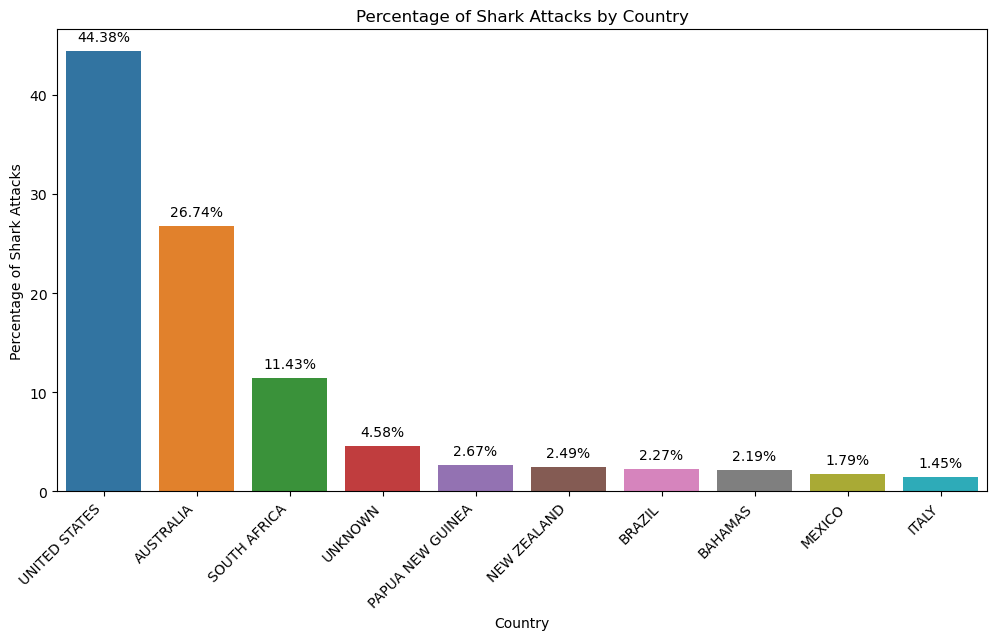

In [110]:
porcentaje_por_pais = (df2['country'].value_counts() / len(df2)) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=porcentaje_por_pais.index, y=porcentaje_por_pais.values)

plt.xlabel('Country')
plt.ylabel('Percentage of Shark Attacks')
plt.title('Percentage of Shark Attacks by Country')

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Percentage of Fatal vs. Non-Fatal Shark Attacks

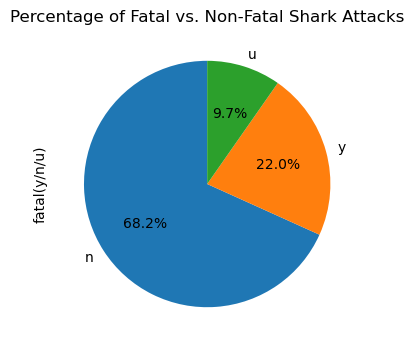

In [114]:
plt.figure(figsize=(4, 4))
df['fatal(y/n/u)'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

plt.title('Percentage of Fatal vs. Non-Fatal Shark Attacks')

plt.show()


In this graph, we can see that 68.2% of the attacks were not fatal, so it can be said that the individuals either suffered minor injuries or, even if the injuries were severe, they survived.

Number of Shark Attacks by Top 10 Species and Fatalities

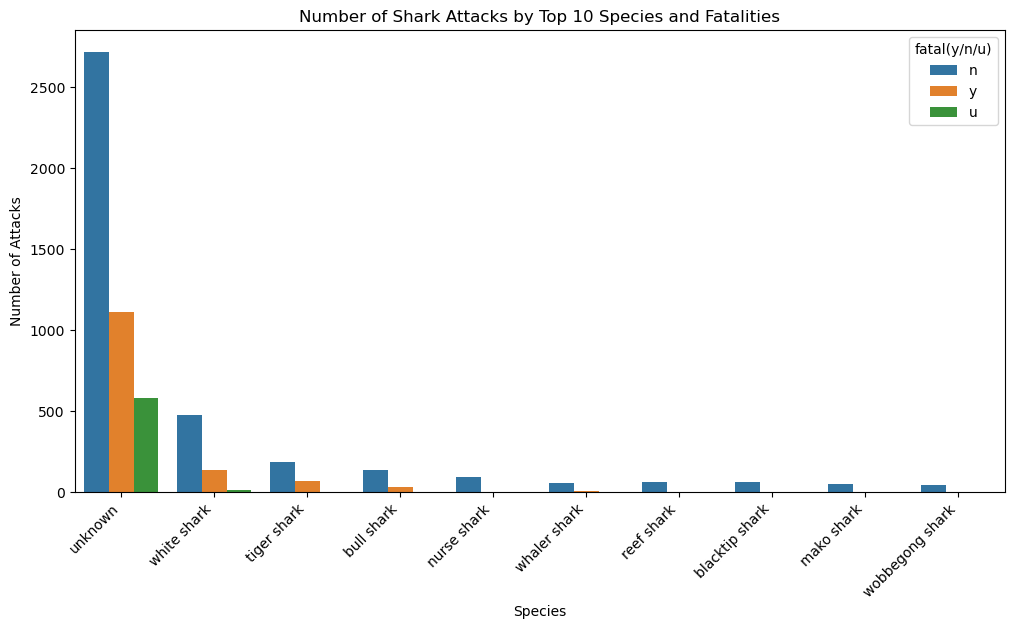

In [115]:
top_10_species = df['species'].value_counts().head(10).index

df_top_10 = df[df['species'].isin(top_10_species)]

plt.figure(figsize=(12, 6))
sns.countplot(x='species', hue='fatal(y/n/u)', data=df_top_10, order=top_10_species)

plt.xlabel('Species')
plt.ylabel('Number of Attacks')
plt.title('Number of Shark Attacks by Top 10 Species and Fatalities')

plt.xticks(rotation=45, ha='right')

plt.show()

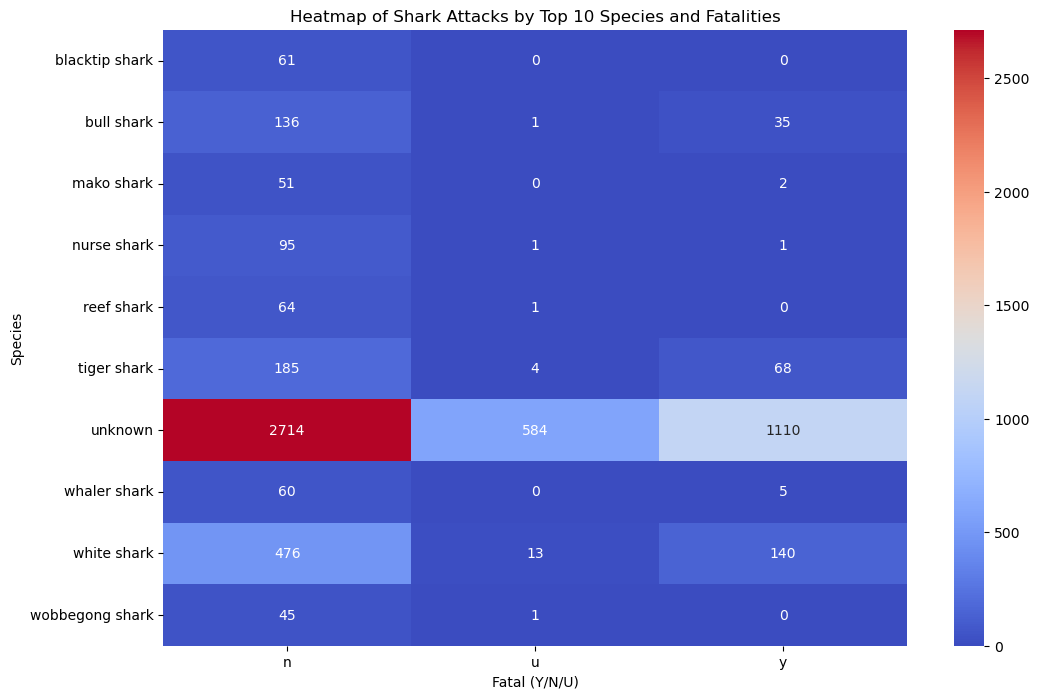

In [109]:
# Seleccionar las 10 especies más fatales
top_10_species = df['species'].value_counts().head(10).index
df_top_10 = df[df['species'].isin(top_10_species)]

# Crear la tabla de contingencia para las 10 especies más fatales
contingency_table_top_10 = pd.crosstab(df_top_10['species'], df_top_10['fatal(y/n/u)'])

# Crear un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table_top_10, annot=True, fmt='d', cmap='coolwarm', cbar=True)

# Añadir etiquetas y título
plt.xlabel('Fatal (Y/N/U)')
plt.ylabel('Species')
plt.title('Heatmap of Shark Attacks by Top 10 Species and Fatalities')

# Mostrar el heatmap
plt.show()


In this bar chart, we can see the top 10 species that have had the most recorded attacks, including their fatality. We observe that the species with the highest number of attacks is the unknown species, of which more than 2500 were non-fatal, over 1000 were fatal, and just over 500 have unknown fatality. Moving on to identified species like the great white shark, nearly 500 attacks were non-fatal, 140 were fatal, and 13 have unknown fatality.
So, we can conclude that the recognized species with the highest number of attacks is the great white shark.

Number of Shark Attacks by Time and Fatalities

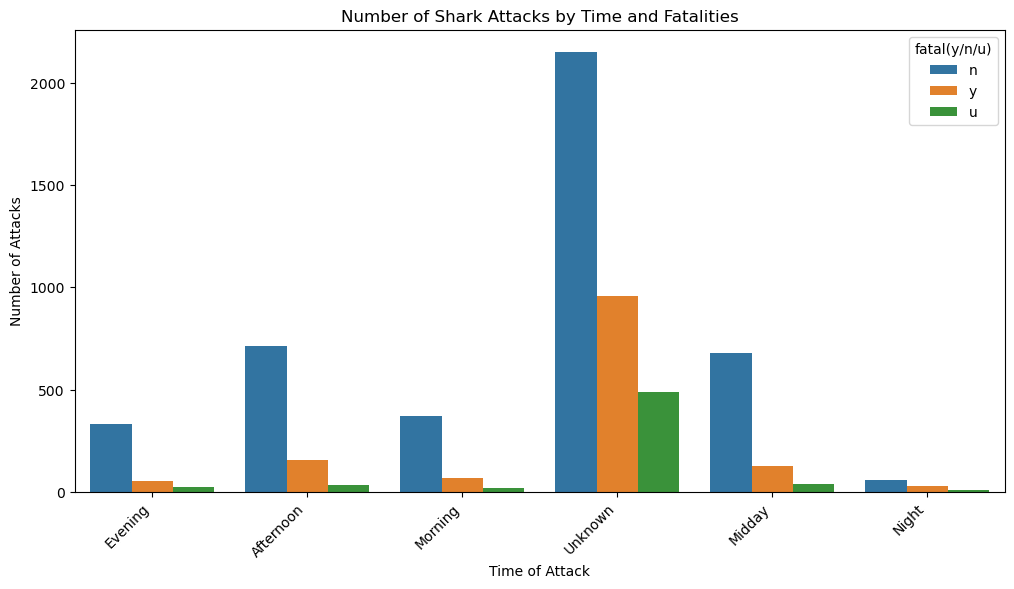

In [116]:
plt.figure(figsize=(12, 6))
sns.countplot(x='time', hue='fatal(y/n/u)', data=df)

plt.xlabel('Time of Attack')
plt.ylabel('Number of Attacks')
plt.title('Number of Shark Attacks by Time and Fatalities')

plt.xticks(rotation=45, ha='right')

plt.show()

Most of the attacks occurred in the "Unknown" category, where there is a considerable proportion of fatal attacks. In relative terms, most attacks in the afternoon and midday were non-fatal. The morning and night have a relatively higher proportion of fatal attacks.

Number of Shark Attacks by Sex and Fatalities

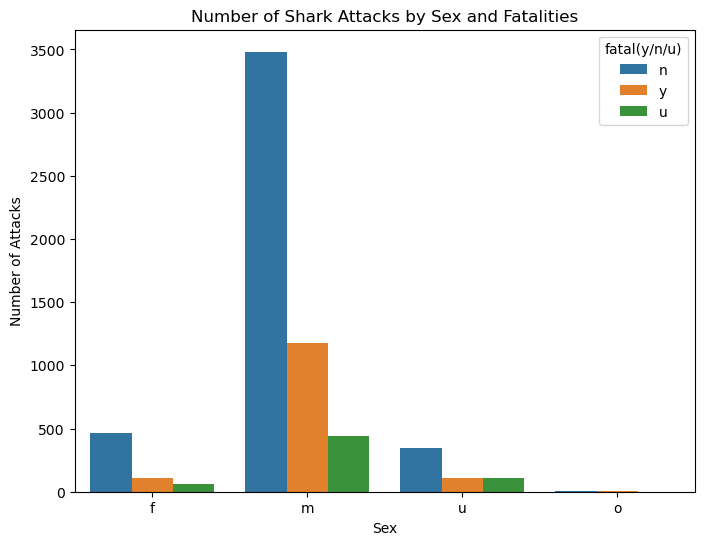

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='fatal(y/n/u)', data=df)

plt.xlabel('Sex')
plt.ylabel('Number of Attacks')
plt.title('Number of Shark Attacks by Sex and Fatalities')

plt.show()


Female (f): 637 attacks (468 non-fatal, 62 fatality unknown, 107 fatal)
Male (m): 5096 attacks (3482 non-fatal, 441 fatality unknown, 1173 fatal)
Other (o): 4 attacks (2 non-fatal, 0 fatality unknown, 2 fatal)
Unknown (u): 565 attacks (349 non-fatal, 109 fatality unknown, 107 fatal)

The majority of attacks occurred in the male category, with a considerable proportion of fatal outcomes.
Females also experienced a notable number of attacks, with a significant proportion being fatal.
The "Unknown" gender category has a substantial proportion of fatal outcomes.

Number of Shark Attacks by Activity and Sex

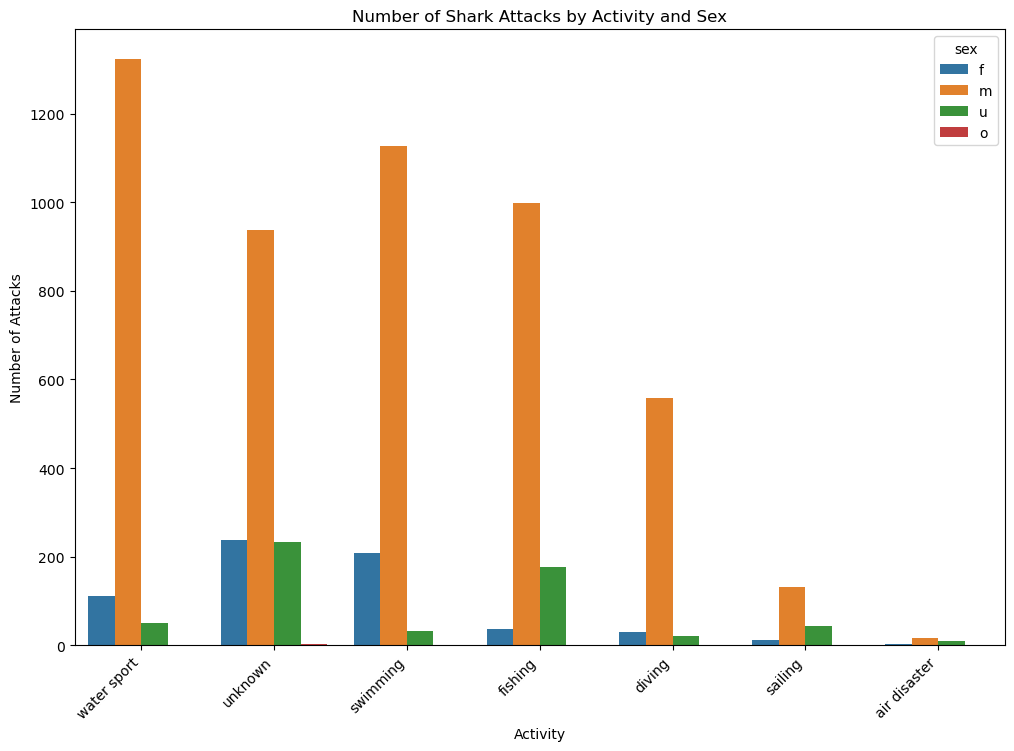

In [118]:
plt.figure(figsize=(12, 8))
sns.countplot(x='activity', hue='sex', data=df, order=df['activity'].value_counts().index)

plt.xlabel('Activity')
plt.ylabel('Number of Attacks')
plt.title('Number of Shark Attacks by Activity and Sex')

plt.xticks(rotation=45, ha='right')

plt.show()


In this case, we can observe that in all activities reflecting shark attacks, there are more men involved, particularly in water sports, a category that includes paddle, surfing, bodyboard, kayaking. The next categories with the most attacks are swimming and fishing.

In [124]:
contingency_table4 = pd.crosstab(df['sex'], df['fatal(y/n/u)'])

# Mostrar la tabla de contingencia
print(contingency_table4)

fatal(y/n/u)     n    u     y
sex                          
f              468   62   107
m             3482  441  1173
o                2    0     2
u              349  109   107


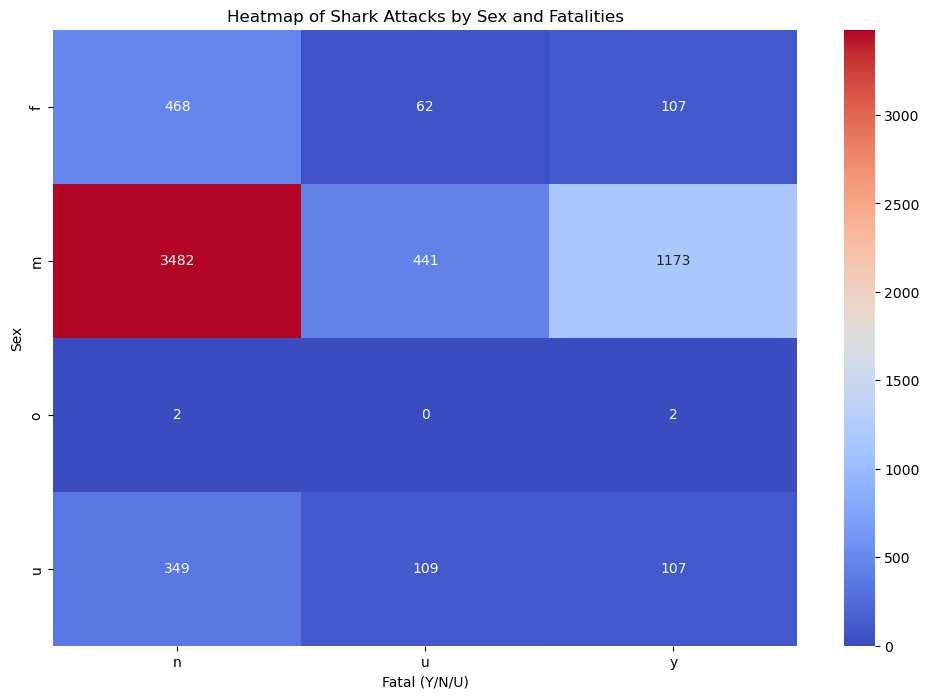

In [131]:
contingency_table4 = pd.crosstab(df['sex'], df['fatal(y/n/u)'])

# Crear un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table4, annot=True, fmt='d', cmap='coolwarm', cbar=True)

# Añadir etiquetas y título
plt.xlabel('Fatal (Y/N/U)')
plt.ylabel('Sex')
plt.title('Heatmap of Shark Attacks by Sex and Fatalities')

# Mostrar el heatmap
plt.show()

Female (f): 637 attacks (468 non-fatal, 62 fatality unknown, 107 fatal)
Male (m): 5096 attacks (3482 non-fatal, 441 fatality unknown, 1173 fatal)
Other (o): 4 attacks (2 non-fatal, 0 fatality unknown, 2 fatal)
Unknown (u): 565 attacks (349 non-fatal, 109 fatality unknown, 107 fatal)

Males are more frequently involved in shark attacks, and a considerable proportion of these incidents result in fatalities.
Females also experience a noteworthy number of shark attacks, with a significant proportion being fatal.
The "Unknown" gender category presents a substantial proportion of fatal outcomes.

In [127]:
contingency_table1 = pd.crosstab(df['activity'], df['fatal(y/n/u)'])

print(contingency_table)


fatal(y/n/u)     n    u    y
activity                    
air disaster     7    9   13
diving         399   69  141
fishing        973   78  162
sailing         68   28   91
swimming       726  131  510
unknown        882  227  301
water sport   1246   70  171


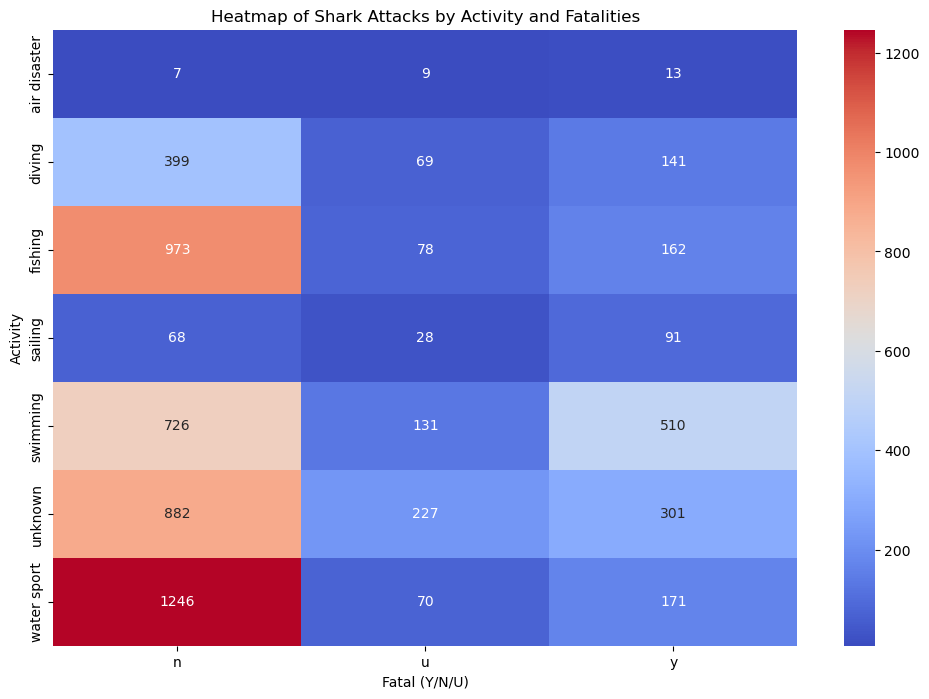

In [128]:

contingency_table1 = pd.crosstab(df['activity'], df['fatal(y/n/u)'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True)

plt.xlabel('Fatal (Y/N/U)')
plt.ylabel('Activity')
plt.title('Heatmap of Shark Attacks by Activity and Fatalities')

plt.show()


"Water Sport" has the highest total number of incidents,(Perhaps "Water Sport" has a higher total number of accidents because it encompasses various sports such as surfing, paddleboarding, bodyboarding, and kayaking) followed by "Unknown" and "Swimming."
"Swimming" has a relatively high number of fatal incidents.
"Diving" and "Fishing" also have a significant number of fatal incidents.

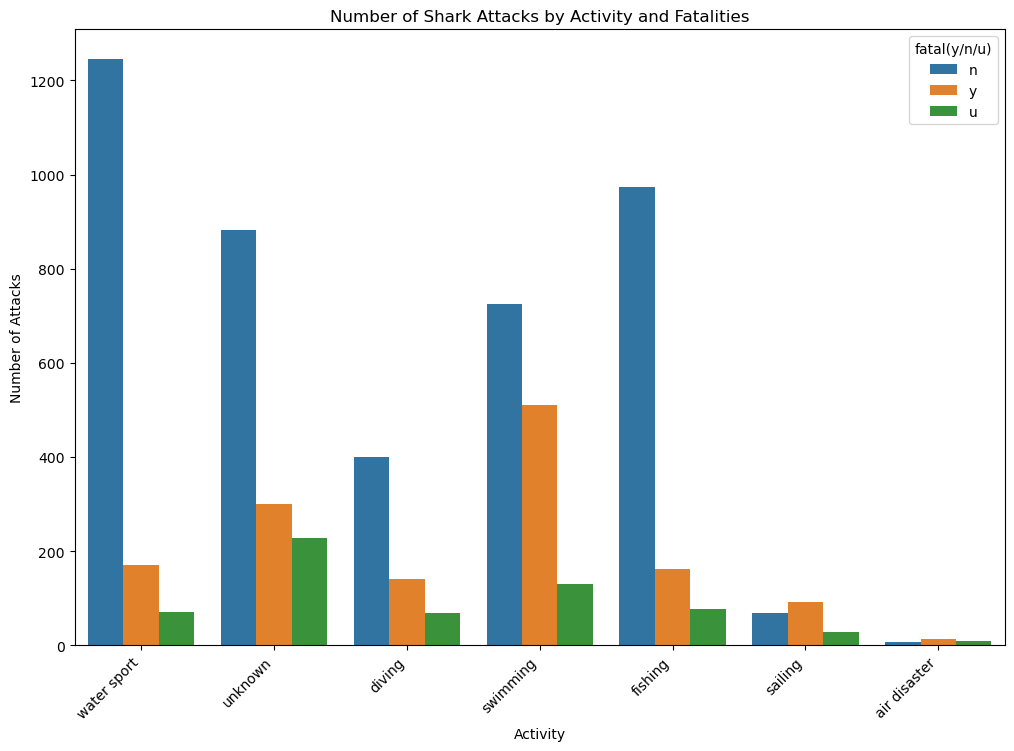

In [132]:
plt.figure(figsize=(12, 8))
sns.countplot(x='activity', hue='fatal(y/n/u)', data=df)

plt.xlabel('Activity')
plt.ylabel('Number of Attacks')
plt.title('Number of Shark Attacks by Activity and Fatalities')

plt.xticks(rotation=45, ha='right')

plt.show()


In [133]:
contingency_table2 = pd.crosstab(df['injury'], df['fatal(y/n/u)'])

print(contingency_table2)

fatal(y/n/u)     n    u    y
injury                      
dead            25  160  151
injured       3183  139  328
no injury      813   98   15
unknown        280  215  895


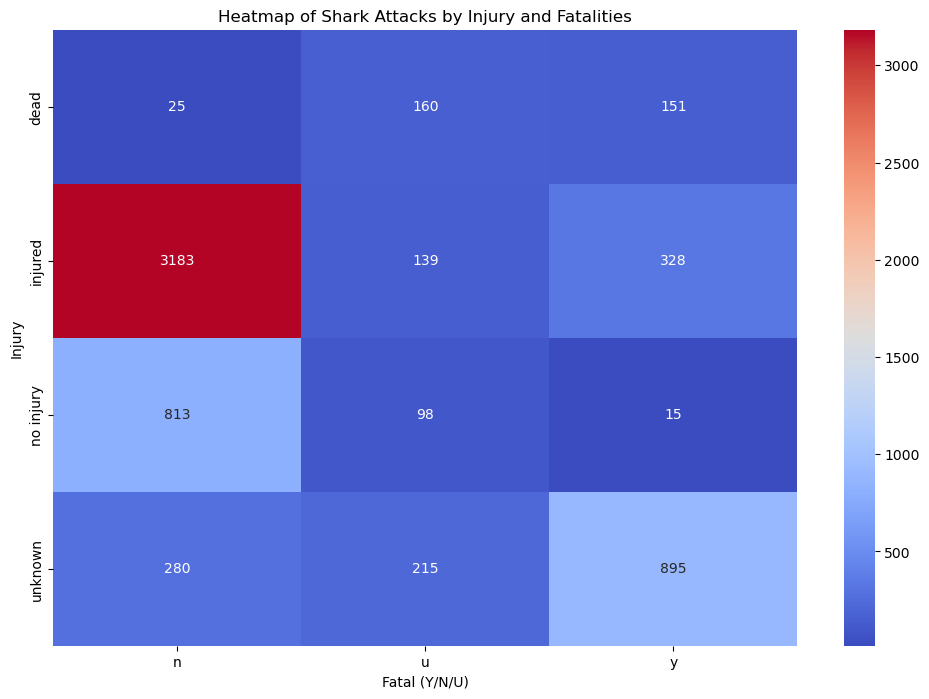

In [135]:
contingency_table2 = pd.crosstab(df['injury'], df['fatal(y/n/u)'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table2, annot=True, fmt='d', cmap='coolwarm', cbar=True)

plt.xlabel('Fatal (Y/N/U)')
plt.ylabel('Injury')
plt.title('Heatmap of Shark Attacks by Injury and Fatalities')

plt.show()

The majority of incidents result in injuries, with "Injured" having the highest total count.
The "Dead" category has a relatively lower count, but a significant proportion of incidents within this category are fatal.
The "Unknown" injury status category has a notable proportion of fatal incidents.

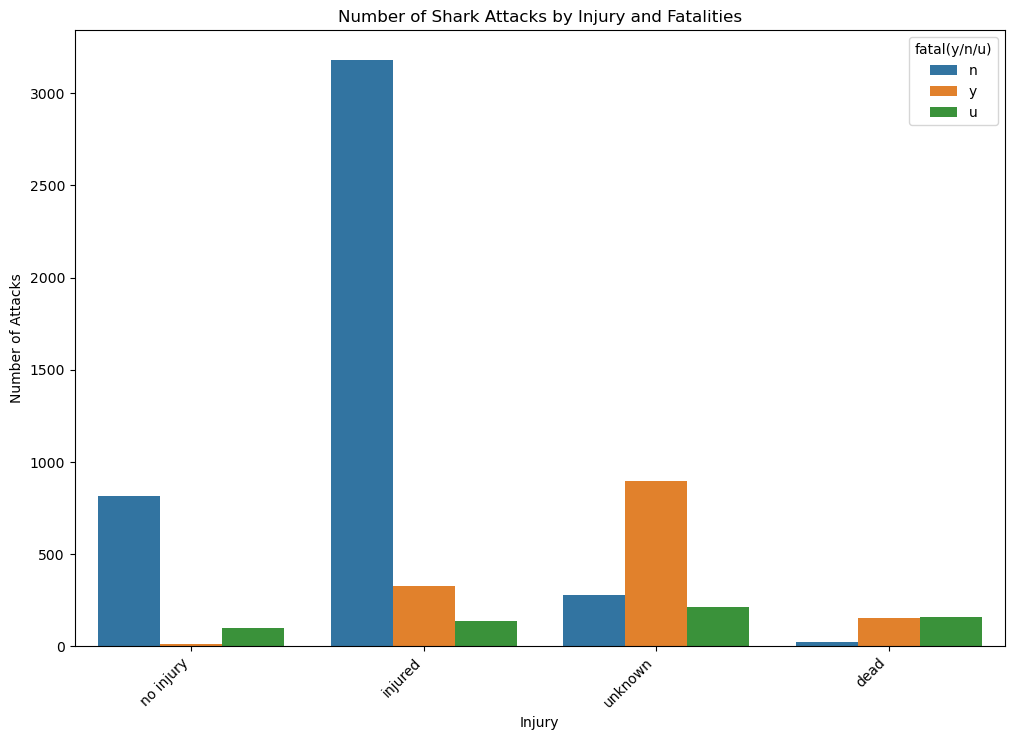

In [105]:
plt.figure(figsize=(12, 8))
sns.countplot(x='injury', hue='fatal(y/n/u)', data=df)

# Añadir etiquetas y título
plt.xlabel('Injury')
plt.ylabel('Number of Attacks')
plt.title('Number of Shark Attacks by Injury and Fatalities')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

In [120]:
contingency_table3 = pd.crosstab(df['time'], df['fatal(y/n/u)'])

# Mostrar la tabla de contingencia
print(contingency_table3)

fatal(y/n/u)     n    u    y
time                        
Afternoon      712   35  154
Evening        334   23   54
Midday         678   40  129
Morning        369   19   68
Night           57    8   28
Unknown       2151  487  956


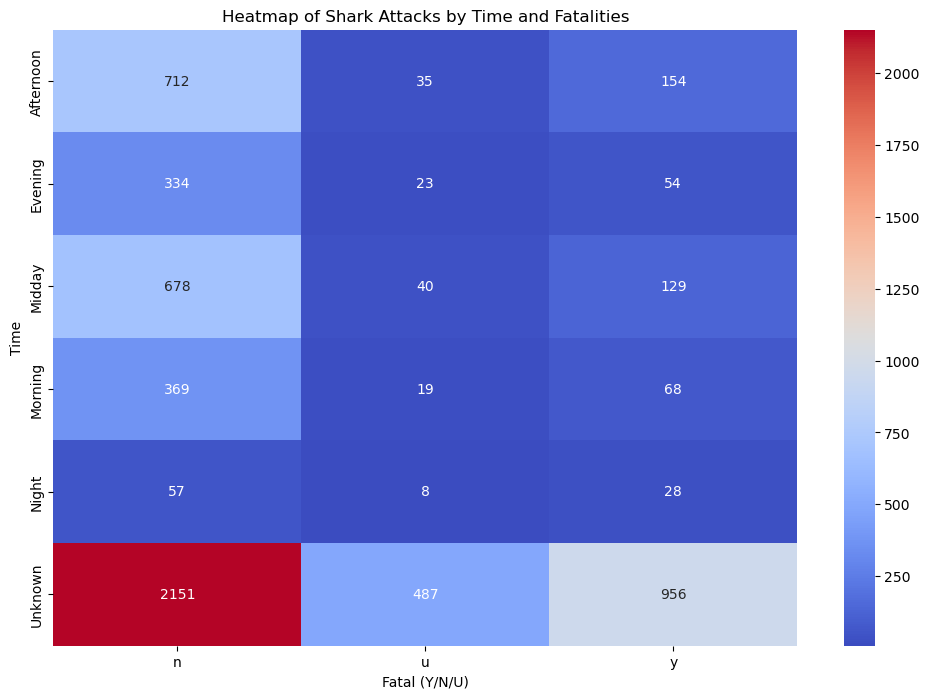

In [137]:
contingency_table3 = pd.crosstab(df['time'], df['fatal(y/n/u)'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table3, annot=True, fmt='d', cmap='coolwarm', cbar=True)

plt.xlabel('Fatal (Y/N/U)')
plt.ylabel('Time')
plt.title('Heatmap of Shark Attacks by Time and Fatalities')

plt.show()

The highest total number of incidents occurs in the "Unknown" time category, which also has a substantial proportion of fatal outcomes.
In relative terms, the "Afternoon" and "Midday" periods have a higher number of non-fatal incidents compared to fatal incidents.
The "Night" period has a lower total number of incidents, but a relatively higher proportion of fatal outcomes.

In [136]:
contingency_table5 = pd.crosstab(df['age'], df['fatal(y/n/u)'])

print(contingency_table5)

fatal(y/n/u)     n    u    y
age                         
adult          627   71  125
child          225   28   40
elderly         31    6   17
middle-age     189   18   42
teenager       493   32  122
unknown       1695  373  774
young-adult   1041   84  269


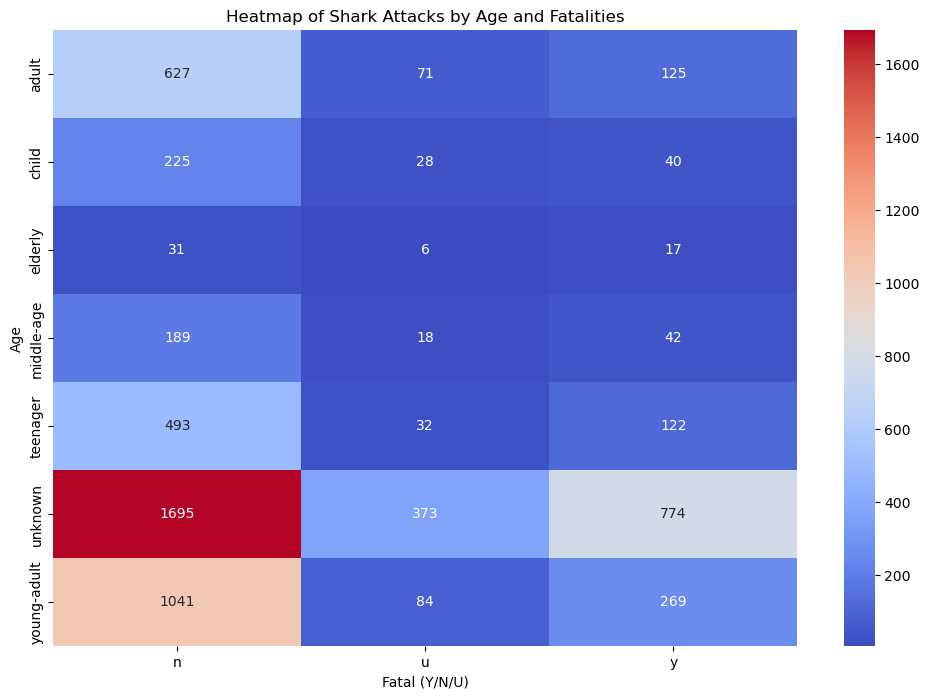

In [139]:
contingency_table5 = pd.crosstab(df['age'], df['fatal(y/n/u)'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table5, annot=True, fmt='d', cmap='coolwarm', cbar=True)

plt.xlabel('Fatal (Y/N/U)')
plt.ylabel('Age')
plt.title('Heatmap of Shark Attacks by Age and Fatalities')

plt.show()

The majority of incidents involve adults, with a substantial proportion of non-fatal outcomes.
Teenagers also experience a notable number of incidents, with a significant proportion being fatal.
The "Unknown" age category has the highest total incidents, making it challenging to draw conclusions about the distribution of fatal outcomes.
Elderly individuals have the lowest total number of incidents.